import library pandas= loading data dan prosesan , library numpy = pemprosesan angka ke statistika, library matplotlib= visualisasi data , library scipy = 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import scipy as sc
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

load data dengan variable df , dengan separasi(pemisah) parameter ;

In [2]:
df = pd.read_csv(r"C:\Users\HP\AirQualityUCI.csv", sep=";", decimal=",")

mengecek masing-masing kolom 

In [3]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

mengetahui jumlah data  dan kolom 

In [4]:
df.shape

(9357, 15)

mendeskribsikan data terdiri dari : count,mean, dll

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


melihat data pertama 

In [6]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


memisahkan karakter sebelum ada tanda :

In [7]:
df['Hour']= df ['Time'].apply(lambda x: int (x.split(':')[0]))

In [8]:
df['Hour'].head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [9]:
print("jumlah missing value pada setiap kolom : \n", df.shape[0]-df.count())

jumlah missing value pada setiap kolom : 
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
dtype: int64


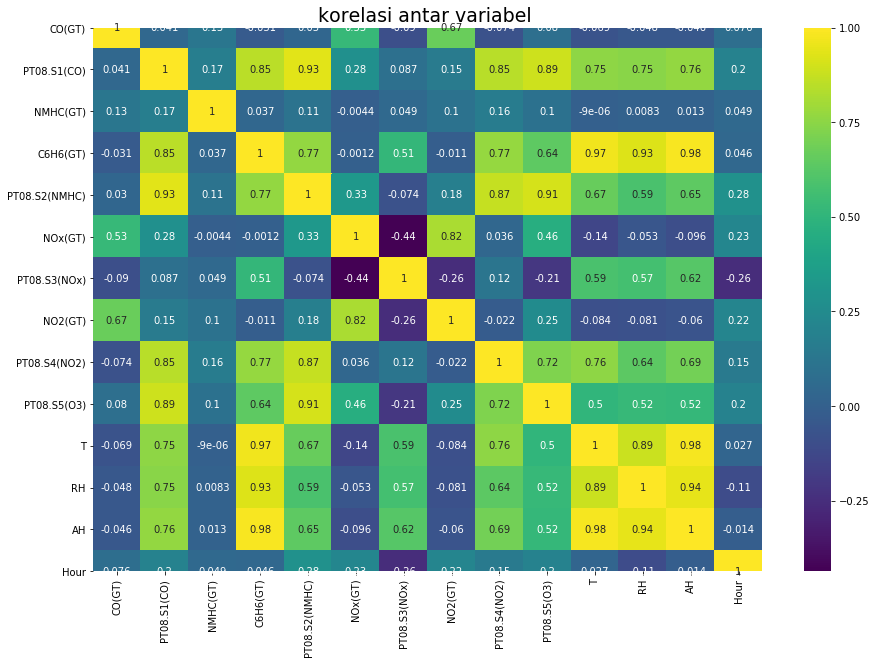

In [10]:
mpl.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
mpl.title('korelasi antar variabel ',fontsize =19)
mpl.show()

plottingf semua variabel terhadap variabel target/ y (RH)

In [ ]:
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df,markers='.')

menampung data x= variabel  dan y = target

In [13]:
x=df[col_].drop('RH',1)
y=df['RH']

NORMALISASI DATA x

In [14]:
sc=StandardScaler()

In [15]:
x_sc=sc.fit_transform(x)

membagi data set menjadi 2 bagian 70% train, 30% test 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size = 0.3 , random_state = 50 )

In [18]:
print("jumlah data train =", x_train.shape)
print("jumlah data test =", x_test.shape)


jumlah data train = (6549, 13)
jumlah data test = (2808, 13)


melatih model dengan metode linier regresi

In [20]:
lr=LinearRegression()
lr_model=lr.fit(x_train, y_train)

In [21]:
y_pre=lr_model.predict(x_test)

In [22]:
rmse=np.sqrt(mean_squared_error(y_test, y_pre))
print("error RMSE adalah", rmse)

error RMSE adalah 7.882391921484393


In [23]:
import pickle

In [26]:
modelsvd="model.pkl"
pickle.dump(lr, open(modelsvd, 'wb'))

In [27]:
loaded_model = pickle.load(open(modelsvd, 'rb'))

In [28]:
loaded_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)